In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [24]:
X_test.shape

(10000, 32, 32, 3)

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
y_train.shape

(50000, 1)

In [27]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
y_test = y_test.reshape(-1,)

In [30]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [31]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

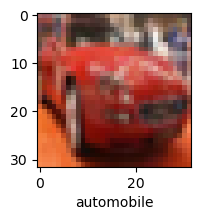

In [32]:
plot_sample(X_train, y_train, 5)

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
#X_train = X_train[:50000]
#y_train = y_train[:50000]

In [35]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
           loss= 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.3068 - loss: 1.9311
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4209 - loss: 1.6434
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4529 - loss: 1.5526
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4801 - loss: 1.4845
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4948 - loss: 1.4338


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test) 
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification reporrt: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
classification reporrt: 
               precision    recall  f1-score   support

           0       0.68      0.40      0.50      1000
           1       0.66      0.56      0.61      1000
           2       0.46      0.15      0.23      1000
           3       0.41      0.16      0.23      1000
           4       0.32      0.62      0.42      1000
           5       0.42      0.34      0.38      1000
           6       0.51      0.56      0.53      1000
           7       0.41      0.70      0.52      1000
           8       0.49      0.74      0.59      1000
           9       0.62      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [38]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

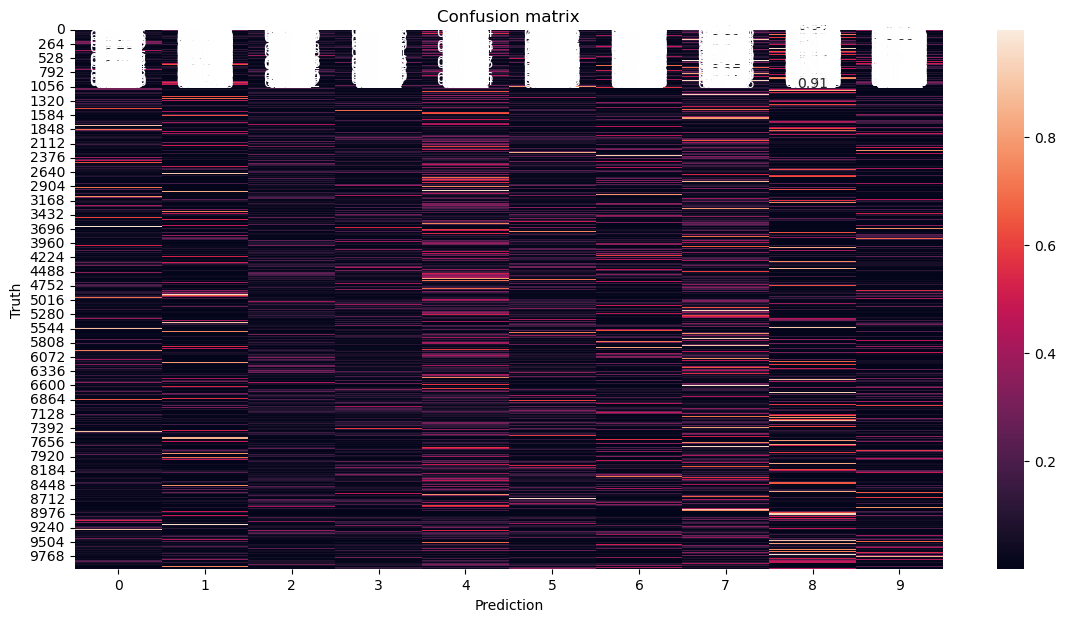

In [39]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3751 - loss: 1.7060
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5982 - loss: 1.1390
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6577 - loss: 0.9826
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6889 - loss: 0.8901
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7217 - loss: 0.8039
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7356 - loss: 0.7591
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7595 - loss: 0.6912
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7810 - loss: 0.6355
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7884 - loss: 0.6076
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8062 - loss: 0.5561


In [46]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7039 - loss: 0.9019


[0.9210159182548523, 0.6969000101089478]

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.67793050e-04, 1.02512866e-04, 4.33926296e-04, 9.81752992e-01,
        1.51097802e-05, 1.40485372e-02, 2.34681275e-03, 1.84319333e-06,
        3.25623463e-04, 4.76651167e-06],
       [5.83823537e-04, 1.95042547e-02, 7.69844988e-08, 6.89093213e-07,
        4.30346773e-07, 3.39846129e-09, 3.89692971e-08, 2.55624855e-08,
        9.79654014e-01, 2.56570318e-04],
       [4.37004939e-02, 3.51312459e-02, 1.17421267e-03, 6.45928737e-03,
        1.97999529e-04, 2.04771641e-03, 1.98297622e-03, 1.43889757e-03,
        8.71354640e-01, 3.65125686e-02],
       [9.52072740e-01, 2.63341516e-03, 3.78188415e-04, 6.15063391e-06,
        2.01809371e-06, 8.17856716e-08, 6.21176923e-06, 3.83114163e-08,
        4.48670499e-02, 3.40564693e-05],
       [6.34241087e-06, 8.38845335e-06, 5.21584647e-03, 4.23639715e-02,
        2.77822018e-01, 5.48729766e-03, 6.68982744e-01, 6.94663322e-05,
        4.26294246e-05, 1.35271910e-06]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

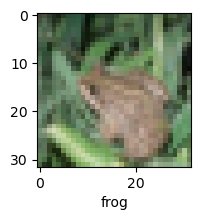

In [50]:
plot_sample(X_test, y_test, 4)

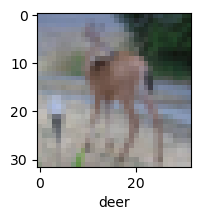

In [51]:
plot_sample(X_test, y_test, 100)

In [53]:
classes[y_classes[4]]

'frog'